Training Data:
[[-0.47312593 -1.36924523  1.20583742 -1.42030471 -0.8682996   0.93948006
  -1.08692965  1.07524834  0.75202832  1.75143987  1.76353833  1.7788355 ]
 [ 1.36212941 -0.70370817  1.14389513 -0.14686934  0.69223956 -0.90609826
  -0.17033132  0.48303816 -1.126532   -0.13737902 -2.07483079 -0.83511769]
 [-1.1541091  -0.16875532 -1.98735646 -0.38003039 -0.30174565  1.15755889
   2.13155449  0.19357856  0.04329251  0.0813995   0.38839056  0.08226878]
 [-0.1709576  -0.0158295   0.69956     1.46345173  0.92339031 -0.86641996
   1.38328666 -0.41527755 -2.1645286  -0.03808665  0.55007314  0.54963782]
 [-0.18249425 -1.17919289  0.6555925  -0.8025252  -0.28085033 -1.28408898
   0.58974554 -1.60799504  1.15599694 -0.8355578   0.52208509  0.64787786]]
[ 1 -1  1 -1 -1]

Testing Data:
[[ 0.36442433  2.24384044 -1.39415643 -0.8444285   1.53690445  0.52019132
  -0.58766128  0.02272272  0.07155692 -0.41983091 -0.00373516  0.17433469]
 [ 0.53871525  1.02456214  0.01483825  0.07198987 -1.67302

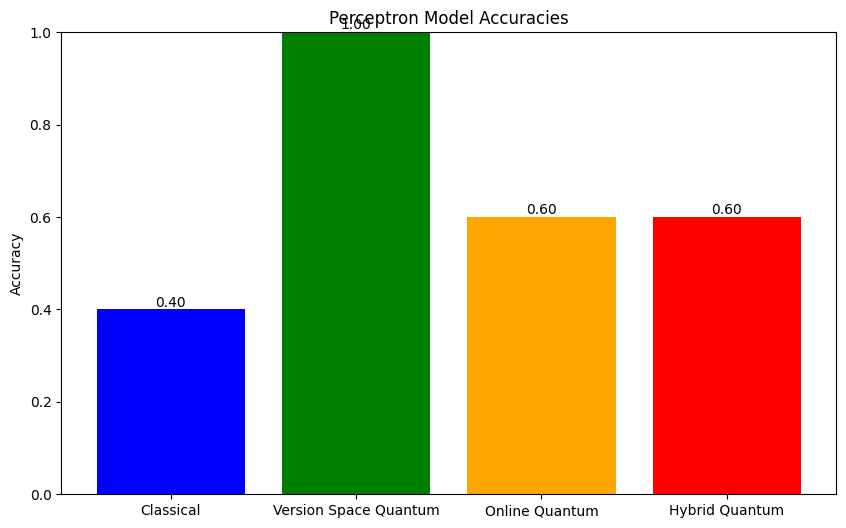

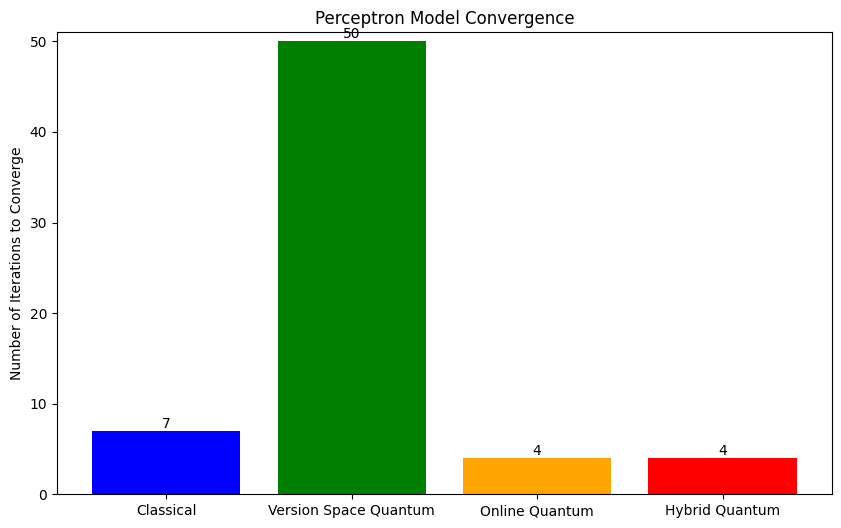

In [1]:
# notebooks/quantum_perceptron_comparison.ipynb

# %%
import sys
import os
import numpy as np
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Adjust the path to import models
sys.path.append(os.path.abspath('..'))

from models import common
from models import classical_perceptron
from models import version_space_perceptron
from models import online_quantum_perceptron
from models import hybrid_quantum_perceptron

# %%
# Load the dataset
X_train, X_test, y_train, y_test = common.load_dataset()
print("Training Data:")
print(X_train)
print(y_train)
print("\nTesting Data:")
print(X_test)
print(y_test)

# %%
# Classical Perceptron
clf = classical_perceptron.Perceptron()
clf.train(X_train, y_train)
y_pred_classical = clf.predict(X_test)
acc_classical = accuracy_score(y_test, y_pred_classical)
print(f"Classical Perceptron Accuracy: {acc_classical * 100:.2f}%")
print(f"Classical Perceptron Convergence Steps: {clf.convergence_steps}")

# %%
# Version Space Quantum Perceptron
weights_vs, steps_vs = version_space_perceptron.version_space_quantum_perceptron(X_train, y_train)
y_pred_vs = np.sign(np.dot(X_test, weights_vs))
acc_vs = common.accuracy(y_test, y_pred_vs)
print(f"Version Space Quantum Perceptron Accuracy: {acc_vs * 100:.2f}%")
print(f"Version Space Quantum Perceptron Convergence Steps: {steps_vs}")

# %%
# Online Quantum Perceptron
weights_online, steps_online = online_quantum_perceptron.online_quantum_perceptron(X_train, y_train)
y_pred_online = np.sign(np.dot(X_test, weights_online))
acc_online = common.accuracy(y_test, y_pred_online)
print(f"Online Quantum Perceptron Accuracy: {acc_online * 100:.2f}%")
print(f"Online Quantum Perceptron Update Steps: {steps_online}")

# %%
# Hybrid Quantum Perceptron
weights_hybrid, steps_hybrid = hybrid_quantum_perceptron.hybrid_quantum_perceptron(X_train, y_train)
y_pred_hybrid = np.sign(np.dot(X_test, weights_hybrid))
acc_hybrid = common.accuracy(y_test, y_pred_hybrid)
print(f"Hybrid Quantum Perceptron Accuracy: {acc_hybrid * 100:.2f}%")
print(f"Hybrid Quantum Perceptron Update Steps: {steps_hybrid}")

# %%
# Plotting Accuracies
models = ['Classical', 'Version Space Quantum', 'Online Quantum', 'Hybrid Quantum']
accuracies = [acc_classical, acc_vs, acc_online, acc_hybrid]

plt.figure(figsize=(10, 6))
bars = plt.bar(models, accuracies, color=['blue', 'green', 'orange', 'red'])
plt.ylabel('Accuracy')
plt.title('Perceptron Model Accuracies')
plt.ylim([0, 1])

# Add accuracy labels on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, height, f'{height:.2f}', ha='center', va='bottom')

plt.show()

# %%
# Plotting Convergence Steps
convergence_steps = {
    'Classical': clf.convergence_steps,
    'Version Space Quantum': steps_vs,
    'Online Quantum': steps_online,
    'Hybrid Quantum': steps_hybrid
}

plt.figure(figsize=(10, 6))
bars = plt.bar(convergence_steps.keys(), convergence_steps.values(), color=['blue', 'green', 'orange', 'red'])
plt.ylabel('Number of Iterations to Converge')
plt.title('Perceptron Model Convergence')
plt.ylim([0, max(convergence_steps.values()) + 1])

# Add iteration labels on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, height, f'{height}', ha='center', va='bottom')

plt.show()
